## Introduction
#### Business Understanding
SyriaTel Communications, a leading telecommunications company, faces a significant challenge with customer churn, where customers discontinue their services. This project aims to predict and prevent customer churn, providing substantial real-world value for SyriaTel. By addressing customer churn, SyriaTel can:

1. Reduce Financial Losses: Retaining customers helps in maintaining steady revenue streams by avoiding the loss of monthly or yearly payments.
2. Minimize Customer Acquisition Costs: Acquiring new customers is often more expensive than retaining existing ones. By reducing churn, SyriaTel can lower these acquisition costs.
3. Enhance Customer Satisfaction and Loyalty: By understanding and addressing the reasons behind customer churn, SyriaTel can improve customer satisfaction, leading to increased loyalty and long-term engagement.
4. Gain Competitive Advantage: A lower churn rate can position SyriaTel more favorably in the competitive telecommunications market, attracting more customers through positive word-of-mouth and reputation.
### The project’s real-world value is clear:
 - It helps SyriaTel maintain a stable customer base, optimize operational costs, and improve overall customer experience.


## DATA UNDERSTANDING

The data used in this project is sourced from SyriaTel’s customer records and includes various attributes that are crucial for understanding customer behavior and predicting churn. The key data properties and their relevance to the real-world problem of customer churn are as follows:

1. Customer Service Calls:
Source: Customer service logs.
Properties: Frequency and duration of calls to customer service.
Relevance: Frequent calls to customer service may indicate dissatisfaction or unresolved issues, which are potential indicators of churn. Analyzing these patterns helps identify at-risk customers.
2. Usage Patterns:
Source: Usage records from customer accounts.
Properties: Data usage, call duration, and frequency of service use.
Relevance: Understanding how customers use their plans can reveal engagement levels. Low usage might indicate that customers are not finding value in their plans, which could lead to churn.
3. Geographic Data:
Source: Customer address records.
Properties: Geographic location of customers.
Relevance: Certain regions may have higher churn rates due to factors like network coverage, competition, or regional preferences. Identifying these areas allows for targeted retention strategies.
4. Demographic Information:
Source: Customer profiles.
Properties: Age, gender, income level, etc.
Relevance: Demographic factors can influence customer behavior and preferences. Understanding these can help tailor retention efforts to specific customer segments.
- By explicitly relating these data properties to the real-world problem of customer churn, the project can identify key indicators and patterns that contribute to churn. This comprehensive data understanding is crucial for developing an effective predictive model and crafting targeted interventions to retain customers.

## Exploratory Data Analysis (EDA)
In the EDA portion, the following questions were explored to gain insights into customer churn:

1. Customer Service Calls: Is calling customer service a sign of customer unhappiness/potential churn?
2. Usage Patterns: How much are people using their plan? What can this tell us about churn?
3. Geographic Analysis: Are customers in certain areas more likely to churn?
- By addressing these questions, the project aims to uncover patterns and trends that can inform the development of a predictive model for customer churn. This comprehensive analysis helps SyriaTel understand the factors driving churn and develop strategies to mitigate it.

## DATA PREPARATION

1. Import Necessary Libraries

In [11]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
##2. Data Loading
df = pd.read_csv('syriatel_customer_data.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [40]:
df.tail()

account length  area code  number vmail messages  total day minutes  \
3328             192        415                     36              156.2   
3329              68        415                      0              231.1   
3330              28        510                      0              180.8   
3331             184        510                      0              213.8   
3332              74        415                     25              234.4   

      total day calls  total day charge  total eve minutes  total eve calls  \
3328               77             26.55              215.5              126   
3329               57             39.29              153.4               55   
3330              109             30.74              288.8               58   
3331              105             36.35              159.6               84   
3332              113             39.85              265.9               82   

      total eve charge  total night minutes  ...  phone number_422-5874  \
3328             18.32                279.1  ...                  False   
3329             13.04                191.3  ...                  False   
3330             24.55                191.9  ...                  False   
3331             13.57                139.2  ...                  False   
3332             22.60                241.4  ...                  False   

      phone number_422-6685  phone number_422-6690  phone number_422-7728  \
3328                  False                  False                  False   
3329                  False                  False                  False   
3330                  False                  False                  False   
3331                  False                  False                  False   
3332                  False                  False                  False   

      phone number_422-8268  phone number_422-8333  phone number_422-8344  \
3328                  False                  False                  False   
3329                  False                  False                  False   
3330                  False                  False                  False   
3331                  False                  False                  False   
3332                  False                  False                  False   

      phone number_422-9964  international plan_yes  voice mail plan_yes  
3328                  False                   False                 True  
3329                  False                   False                False  
3330                  False                   False                False  
3331                  False                    True                False  
3332                  False                   False                 True  

[5 rows x 3401 columns]

# Data source and properties
The data used in this project is sourced from SyriaTel's customer records and includes various attributes such as customer service call frequency, usage patterns, geographic information, and demographic details. These properties are crucial for understanding customer behavior and predicting churn.

In [30]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Columns: 3401 entries, account length to voice mail plan_yes
dtypes: bool(3385), float64(8), int64(8)
memory usage: 11.2 MB


### Creation of customer_churn.csv to categorise and deal precisely with Customer Churn from the Syriatel Customer Data

In [50]:
import pandas as pd

# Load the original dataset
df = pd.read_csv('syriatel_customer_data.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())
print(df.info())

# Assuming the dataset contains a column named 'churn' indicating customer churn
# If the column names are different, adjust accordingly

# Save the dataset as customer_churn.csv
df.to_csv('customer_churn.csv', index=False)

print("customer_churn.csv dataset created successfully!")


  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

In [51]:
df = pd.read_csv('customer_churn.csv')

df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [52]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [53]:
# Check for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [54]:
# Check for duplicates
df.duplicated().sum()

0

In [55]:
# Check for nonsensical or placeholder values
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('\n-----------------------------------------------\n')

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

-----------------------------------------------

account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186

In [56]:
len(df['state'].unique())
# DC is included as the 51st state

51

In [57]:
# Check balance of target data 
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [58]:
# Check balance with percentages
# There is definitely imbalance, which I will have to deal with during the Modeling phase
df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

In [59]:
# Check out spread of data and outliers
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

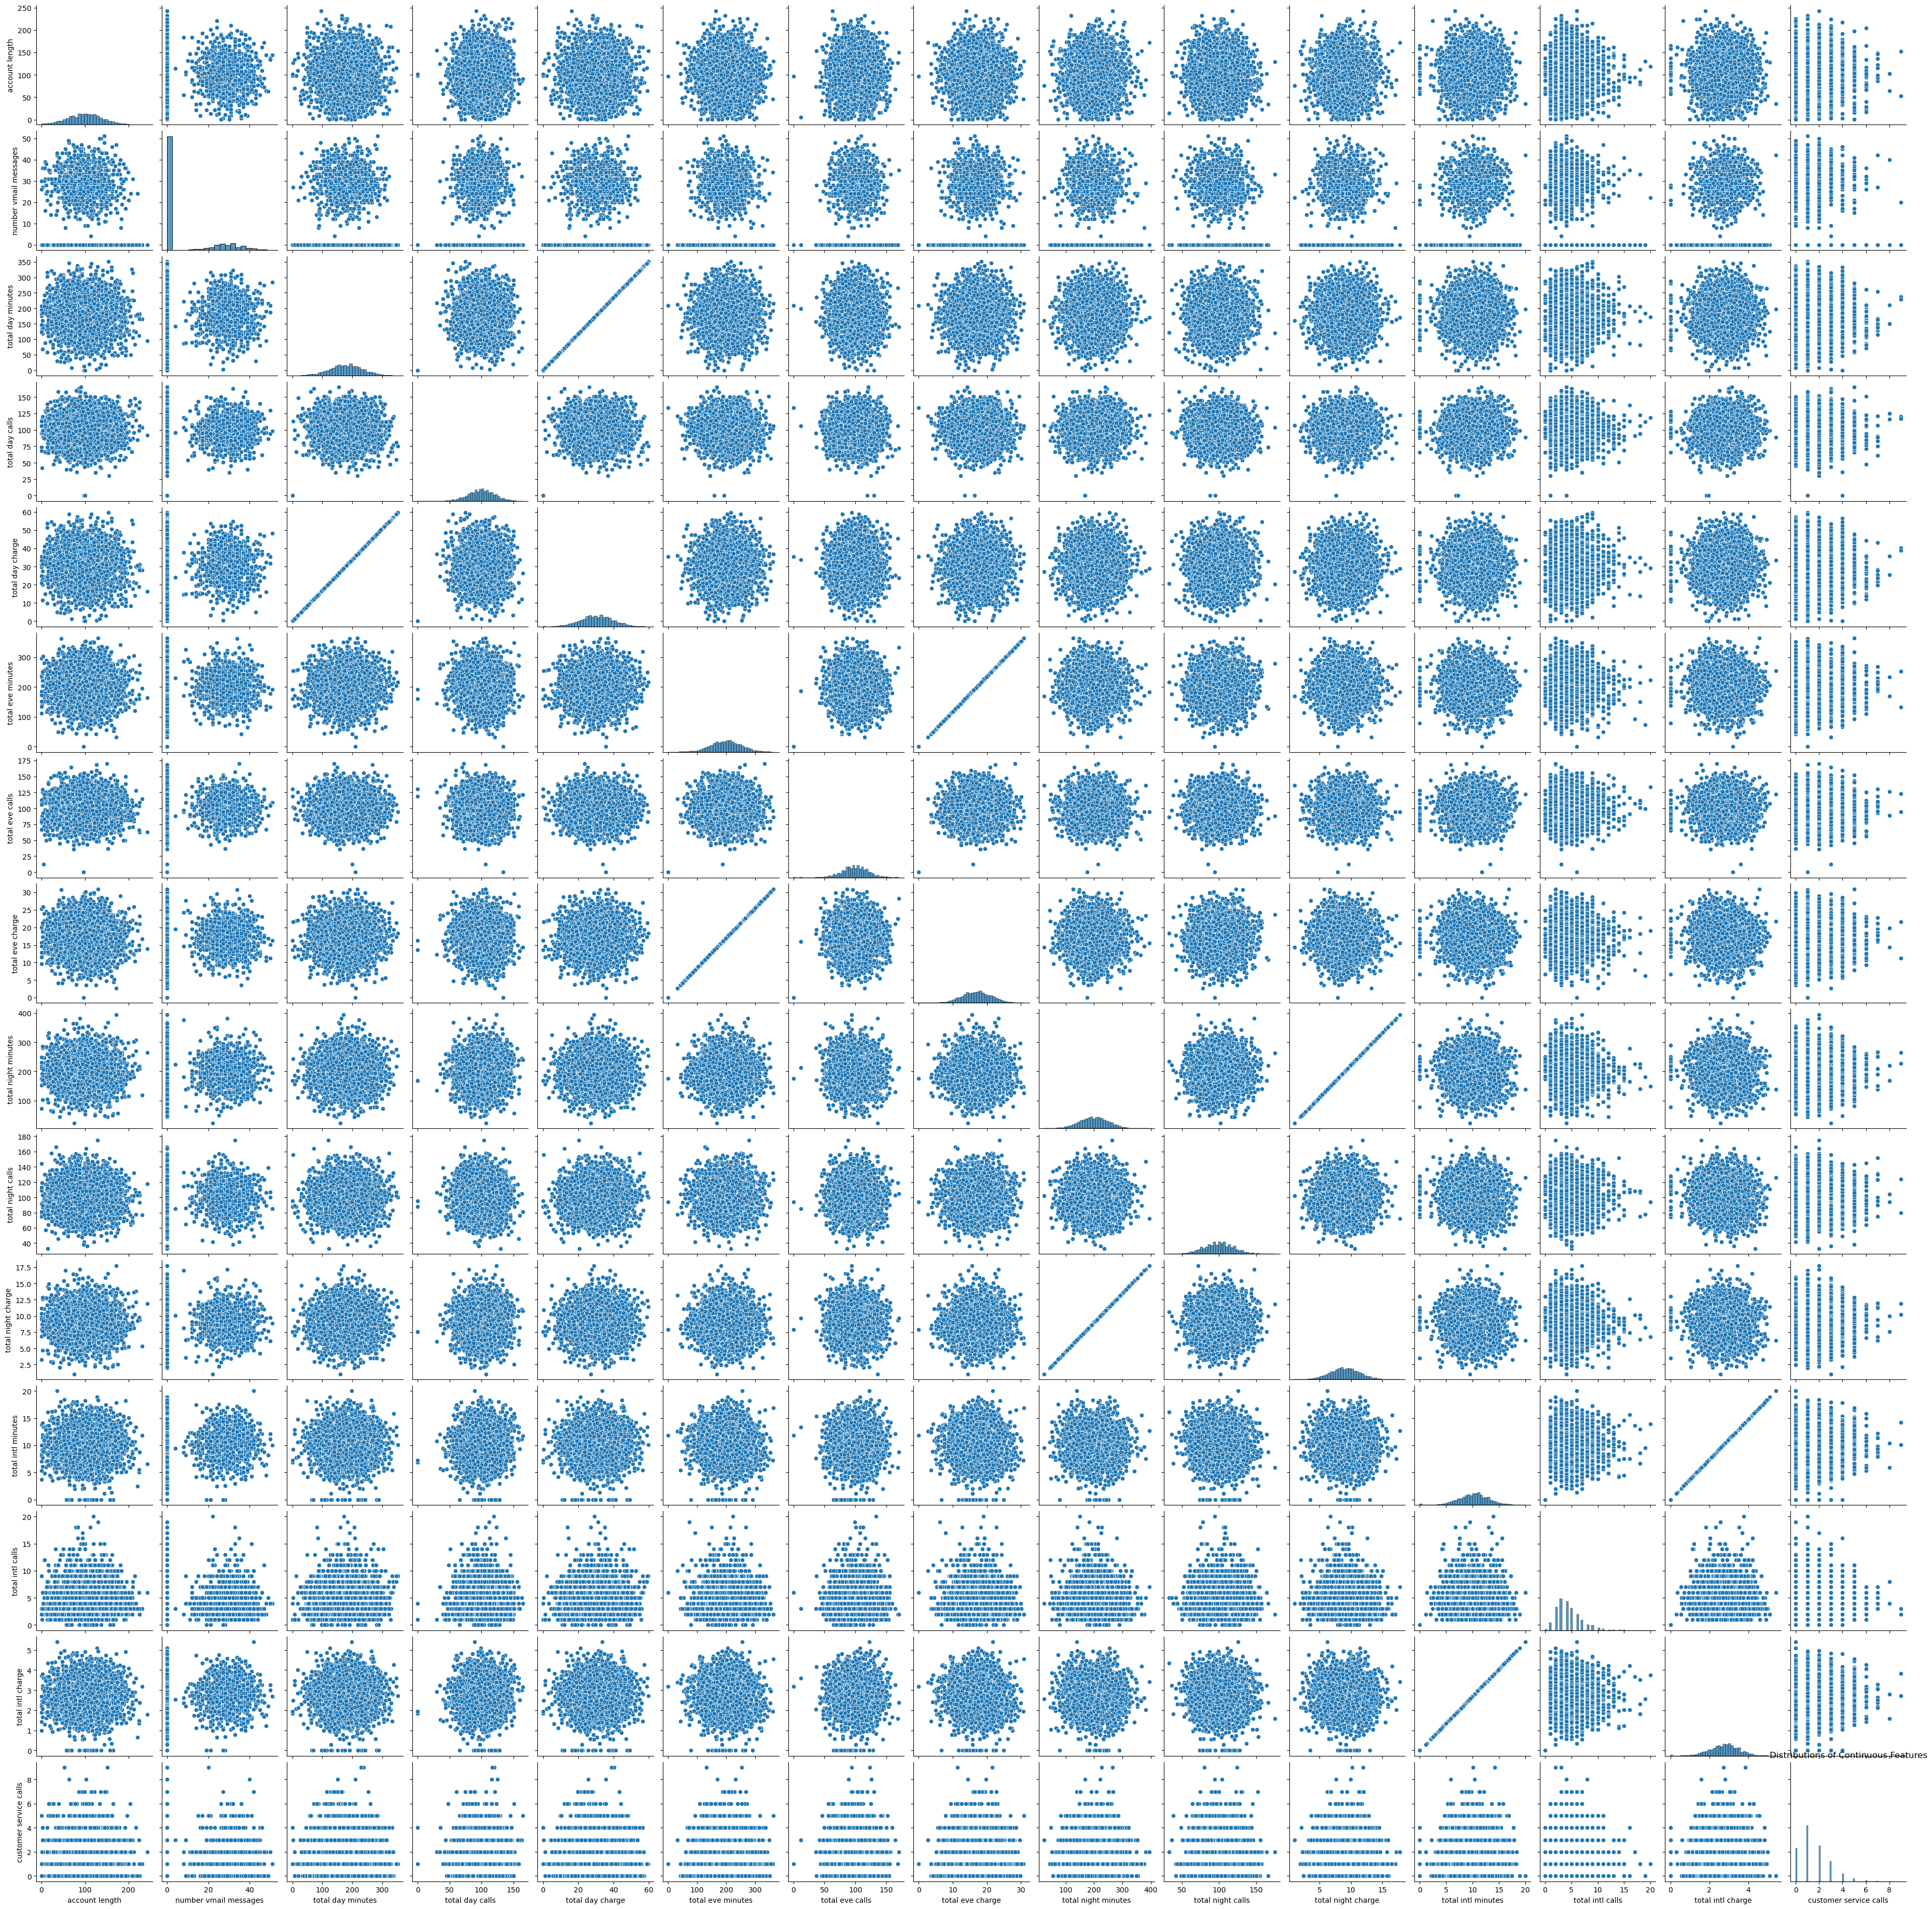

In [60]:
# Check spread of data for major outliers
cont_df = df.drop(columns=['state', 'phone number', 'international plan', 'voice mail plan', 'churn', 'area code'])

sns.pairplot(cont_df)
plt.title('Distributions of Continuous Features')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13220\3875214485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=5)
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


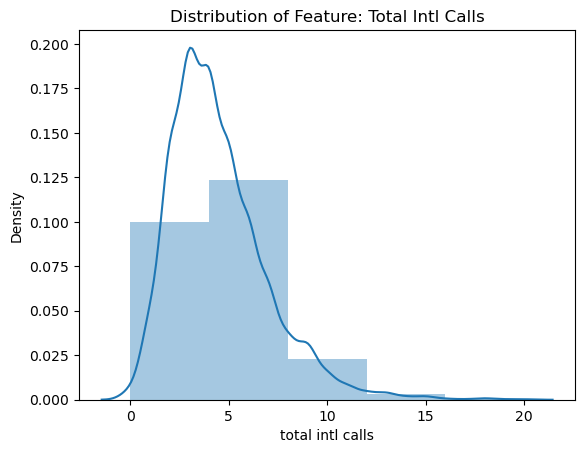

C:\Users\hp\AppData\Local\Temp\ipykernel_13220\3875214485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=5)
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


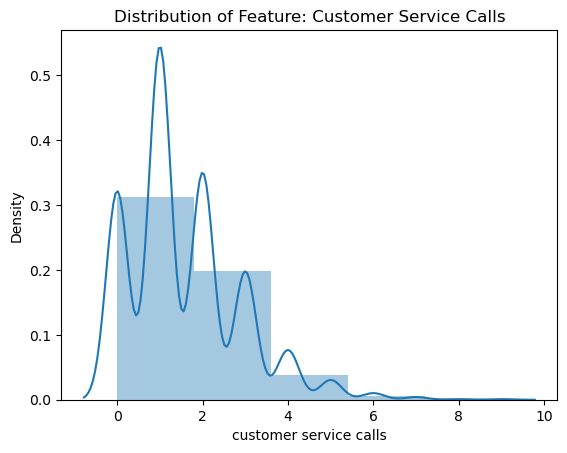

C:\Users\hp\AppData\Local\Temp\ipykernel_13220\3875214485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins=5)
c:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


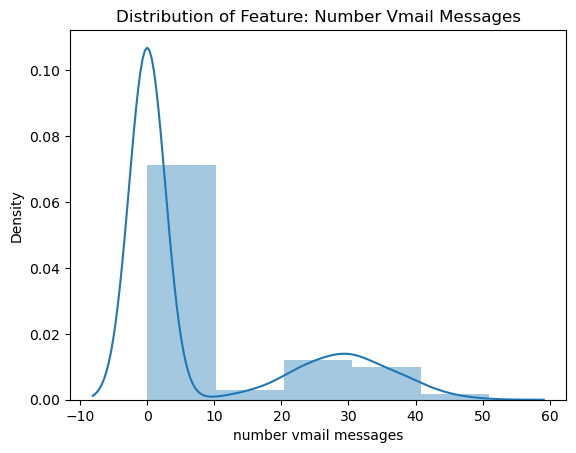

In [61]:
# A closer look at these 3 weird distributions
for col in ['total intl calls', 'customer service calls', 'number vmail messages']:
    sns.distplot(df[col], bins=5)
    plt.title(f'Distribution of Feature: {col.title()}')
    plt.show()

Most of this data is pretty normally distributed with no major outliers.

The only 3 continuous features with strange distributions are the 3 above. However, I don't believe that their outliers are large enough to deal with right now. I might try to feature engineer something later to deal with them.

### Cleaning Conclusion

This dataset was already VERY clean. I didn't need to remove any nulls, duplicates, placeholder values or outliers.

That being said, the scrubbing phase of the OSEMN method is not over yet. I may try to deal with some small outliers with feature engineering during the EDA/Explore phase. I also need to deal with the imbalance of the target column during the Modeling phase. 